# SVM
## Student Performance Prediction
---

In this Notebook, we will use the SVM algorithm to predict the student's performance based on the student's attributes.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("../Data/Prediction of students performance.csv")

In [3]:
dataset.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
dataset["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [6]:
dataset.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

There are no null values in the dataset. Also, all the features appear to be numerical and the target variable is categorical. So, we will standardize the features and encode the target variable.

In [7]:
# extract the features and target variable
y = dataset["Target"]
X = dataset.drop(columns=["Target"])

In [8]:
# Scaling the features
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [9]:
# Encoding the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [10]:
# Splitting the dataset into training and tmp (Validation + Test) set
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Splitting the tmp set into validation and test set
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=42)

## Model Training
### Linear SVM

In [12]:
model = LinearSVC(random_state=42)

In [13]:
model.fit(X_train, y_train)

LinearSVC(random_state=42)

In [14]:
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

## Evaluation

In [15]:
validation_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [16]:
print(f"Validation set accuracy: {validation_accuracy:.2f}")
print(f"Test set accuracy: {test_accuracy:.2f}")

Validation set accuracy: 0.76
Test set accuracy: 0.77


In [17]:
cv_scores = cross_val_score(model, X, y, cv=5)

In [18]:
print(f'Average Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%')

Average Cross-Validation Accuracy: 76.33%


In [19]:
valid_matrix = confusion_matrix(y_val, y_val_pred)

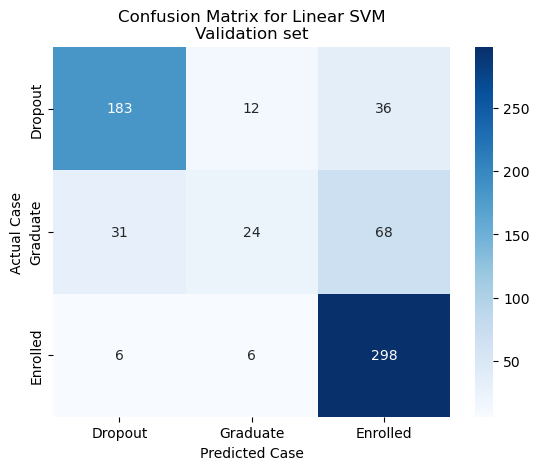

In [20]:
sns.heatmap(valid_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout', 'Graduate', 'Enrolled'], yticklabels=['Dropout', 'Graduate', 'Enrolled'])
plt.ylabel('Actual Case')
plt.xlabel('Predicted Case')
plt.title('Confusion Matrix for Linear SVM\nValidation set')
plt.show()

In [21]:
test_matrix = confusion_matrix(y_test, y_test_pred)

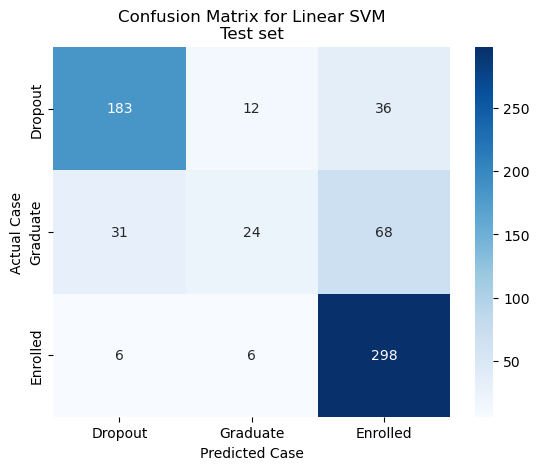

In [22]:
sns.heatmap(valid_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout', 'Graduate', 'Enrolled'], yticklabels=['Dropout', 'Graduate', 'Enrolled'])
plt.ylabel('Actual Case')
plt.xlabel('Predicted Case')
plt.title('Confusion Matrix for Linear SVM\nTest set')
plt.show()

As we can conclude from the results, the linear SVM model has an accuracy of **77%** on test data.

## Non-Linear SVM
### Sigmoid SVM

In [23]:
model = SVC(kernel="sigmoid", random_state=42, C=0.1)

In [24]:
model.fit(X_train, y_train)

SVC(C=0.1, kernel='sigmoid', random_state=42)

In [25]:
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

In [26]:
validation_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [27]:
print(f"Validation set accuracy: {validation_accuracy:.2f}")
print(f"Test set accuracy: {test_accuracy:.2f}")

Validation set accuracy: 0.70
Test set accuracy: 0.74


In [28]:
# finding the number of support vectors for each class and the total
num_support_vectors = model.n_support_

In [29]:
print(f'Number of support vectors for each class: {num_support_vectors}')
print(f'Total number of support vectors: {num_support_vectors.sum()}')

Number of support vectors for each class: [563 549 597]
Total number of support vectors: 1709


The parameter `c` is obtained using trial and error on the validation set. The best value for `c` is **0.1**   
In this case, the accuracy of the model on the test set is **74%**.

The model in this case has **1709** support vectors.

In [30]:
test_matrix = confusion_matrix(y_test, y_test_pred)

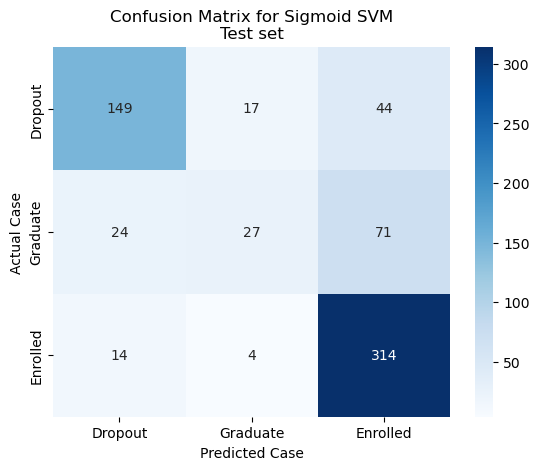

In [31]:
sns.heatmap(test_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout', 'Graduate', 'Enrolled'], yticklabels=['Dropout', 'Graduate', 'Enrolled'])
plt.ylabel('Actual Case')
plt.xlabel('Predicted Case')
plt.title('Confusion Matrix for Sigmoid SVM\nTest set')
plt.show()

### Polynomial SVM

In [32]:
model = SVC(kernel="poly", random_state=42, C=0.8)

In [33]:
model.fit(X_train, y_train)

SVC(C=0.8, kernel='poly', random_state=42)

In [34]:
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

In [35]:
validation_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [36]:
print(f"Validation set accuracy: {validation_accuracy:.2f}")
print(f"Test set accuracy: {test_accuracy:.2f}")

Validation set accuracy: 0.70
Test set accuracy: 0.71


In [37]:
# finding the number of support vectors for each class and the total
num_support_vectors = model.n_support_

In [38]:
print(f'Number of support vectors for each class: {num_support_vectors}')
print(f'Total number of support vectors: {num_support_vectors.sum()}')

Number of support vectors for each class: [602 539 725]
Total number of support vectors: 1866


The parameter `c` is obtained using trial and error on the validation set. The best value for `c` is **0.8**  
In this case, the accuracy of the model on the test set is **71%**.

This model has **1866** support vectors.

In [39]:
test_matrix = confusion_matrix(y_test, y_test_pred)

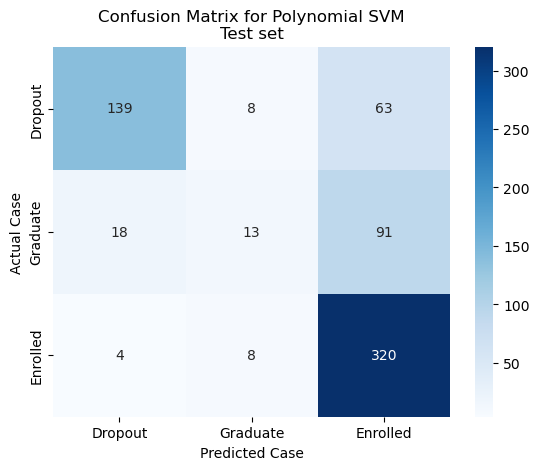

In [40]:
sns.heatmap(test_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout', 'Graduate', 'Enrolled'], yticklabels=['Dropout', 'Graduate', 'Enrolled'])
plt.ylabel('Actual Case')
plt.xlabel('Predicted Case')
plt.title('Confusion Matrix for Polynomial SVM\nTest set')
plt.show()

### RBF SVM

In [41]:
model = SVC(kernel="rbf", random_state=42, C=1.5)

In [42]:
model.fit(X_train, y_train)

SVC(C=1.5, random_state=42)

In [43]:
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

In [44]:
validation_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [45]:
print(f"Validation set accuracy: {validation_accuracy:.2f}")
print(f"Test set accuracy: {test_accuracy:.2f}")

Validation set accuracy: 0.76
Test set accuracy: 0.76


In [46]:
# finding the number of support vectors for each class and the total
num_support_vectors = model.n_support_

In [47]:
print(f'Number of support vectors for each class: {num_support_vectors}')
print(f'Total number of support vectors: {num_support_vectors.sum()}')

Number of support vectors for each class: [545 544 647]
Total number of support vectors: 1736


The parameter `c` is obtained using trial and error on the validation set. The best value for `c` is **1.5**  
In this case, the accuracy of the model on the test set is **76%**.

The model in this case has **1736** support vectors.

In [48]:
test_matrix = confusion_matrix(y_test, y_test_pred)

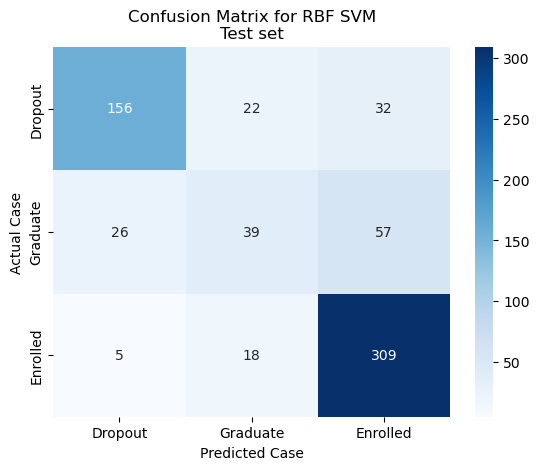

In [49]:
sns.heatmap(test_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout', 'Graduate', 'Enrolled'], yticklabels=['Dropout', 'Graduate', 'Enrolled'])
plt.ylabel('Actual Case')
plt.xlabel('Predicted Case')
plt.title('Confusion Matrix for RBF SVM\nTest set')
plt.show()